In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data.dropna(inplace = True)

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [5]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [6]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [7]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [8]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [9]:
import matplotlib.pyplot as plt

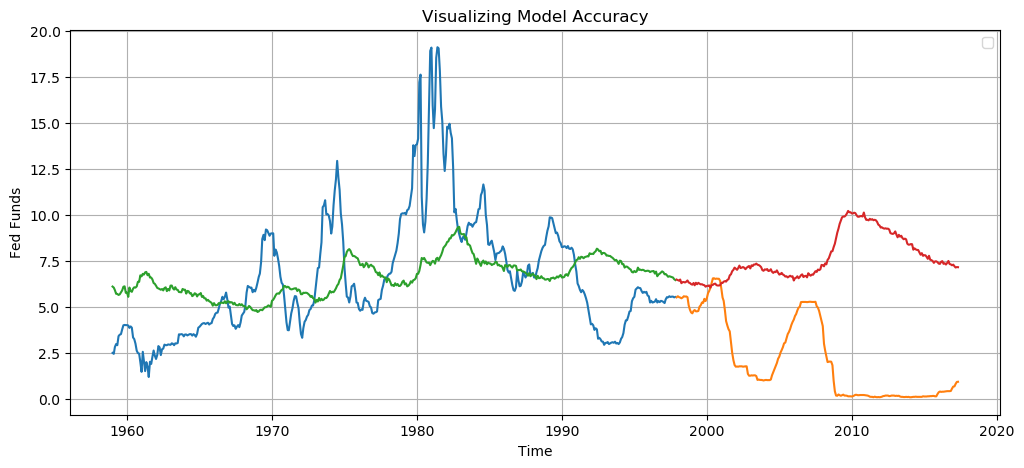

In [11]:
plt.figure(figsize = (12,5))


plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
in_mse_1 = mean_squared_error(y_in, model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out))

In [14]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.360827835668566


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
max_degrees = 3

DEGREES :  1


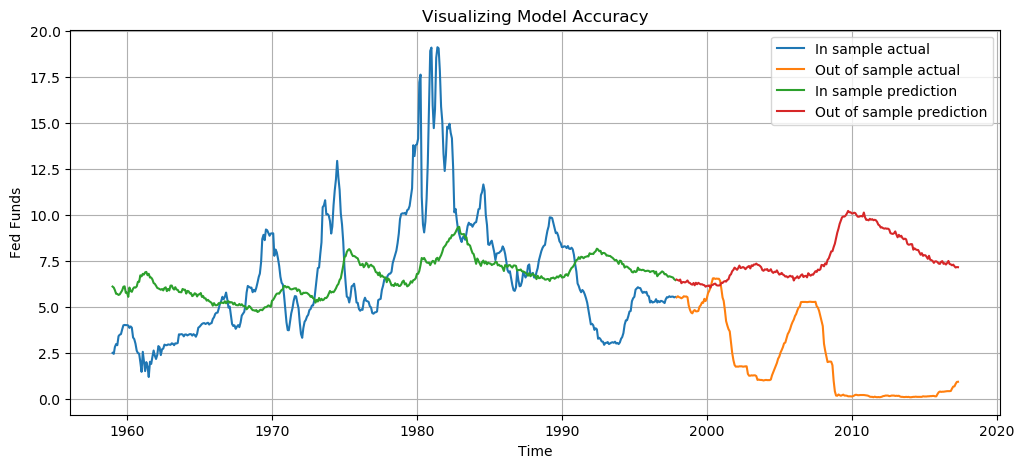

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783565212
DEGREES :  2


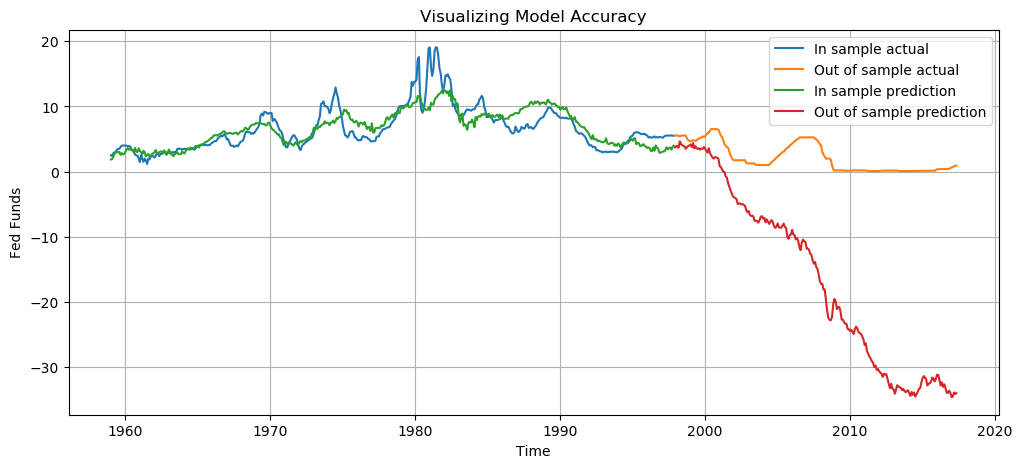

Insample MSE :  3.863477139276067
Outsample MSE :  481.4465099024015
DEGREES :  3


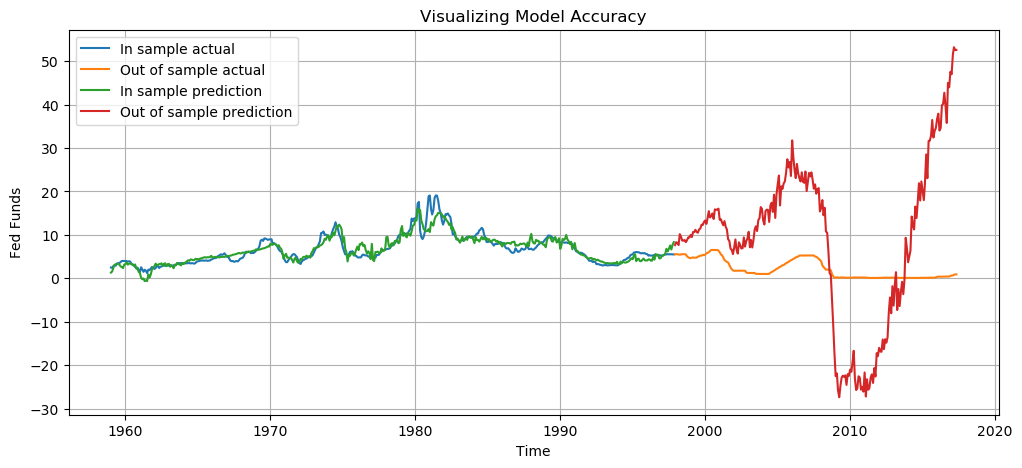

Insample MSE :  1.872363628831326
Outsample MSE :  371.7672613994206


In [18]:
for degrees in range(1, 1+max_degrees):
    print("DEGREES : ", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)

    #Q3.)
    model1 = sm.OLS(y_in, X_in_poly).fit()

    #Q4.)
    plt.figure(figsize = (12,5))

    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index= y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index= y_out.index)
    
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)
    
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["In sample actual", "Out of sample actual", "In sample prediction", "Out of sample prediction"])
    plt.grid()
    plt.show()

    #Q5.)
    in_mse_1 = mean_squared_error(y_in, model1.predict(X_in_poly))
    out_mse_1 = mean_squared_error(y_out, model1.predict(X_out_poly))
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

# 7.) State your observations :

In the first plot, where degrees=1, we see that the model poorly predicts both in and out of sample values. Next, we see that the in sample prediction has improved drastically, while the out of sample prediction has worsened. Finally, the degrees=3 scenario results in an even better in sample prediction, but the out of sample prediction continues to be poor.

We find that the the model is overfit, as there is large deviation for the out of sample predictions from the actual out of sample values. Additionally, we see that the insample MSE is decreasing as the degrees increase, therefore there is less error between the prediction and actual values, while the out of sample MSE is increasing with divergence. Moreover, we find that the difference between the in sample and out of sample MSE is incresing, implying that the complexity is increasing. Overall, we see that with the one-degree model, the predicitons are poor for both in and out of sample, but increasing degrees is improving the predictions for in sample, but not not for out of sample.